In [1]:
import numpy as np
from boostlets_mod import genBoostlet
import matplotlib.pyplot as plt



# Inputs

In [2]:
N = 100
S = 3
n_thetas = 7



In [3]:
# Grid para los parametros a y theta (dilatacion y boosts)
a_grid = 2 ** np.arange(S)
theta_grid = np.linspace(-np.pi/2, np.pi/2, n_thetas)
far_or_near = [0, 1]
n_boostlets = len(far_or_near)*len(a_grid)*len(theta_grid) + 1

# Primero, la función de escala (boost_type=1)
phi0 = genBoostlet(N, a_i = S-1, theta_j=0.0, far_or_near=0, boost_type=1)[0]


Psi = np.zeros((N, N, n_boostlets), dtype=complex)
Psi[:,:,0] = phi0

# Luego cada uno de los boostlets en distintas escalas
boost_type = 2
count=1
for f_farNear in far_or_near:
    for a_i in a_grid:
        for theta_j in theta_grid:
            phi = genBoostlet(N, a_i, theta_j, f_farNear, boost_type)[0]
            Psi[:,:,count] = phi
            count += 1

print(count)



43


## Save file

In [5]:
from scipy.io import savemat
import os

mdic = {"Psi": Psi, "label": f"{n_boostlets} boostlets, scales: S={S}, boosts: n_thetas={n_thetas}"}

print(mdic['label'])
folder = "./dependencies/basisFunctions/boostlets/"
file = f"boostlets_N_{N}_S_{S}_nthetas_{n_thetas}.mat"
file_path = os.path.join(folder, file)

# Obtener el directorio del archivo
directory = os.path.dirname(file_path)

# Crear el directorio si no existe
if not os.path.exists(directory):
    os.makedirs(directory)
    
savemat(file_path, mdic)


43 boostlets, scales: S=3, boosts: n_thetas=7
./dependencies/basisFunctions/boostlets


## Plot boostlets

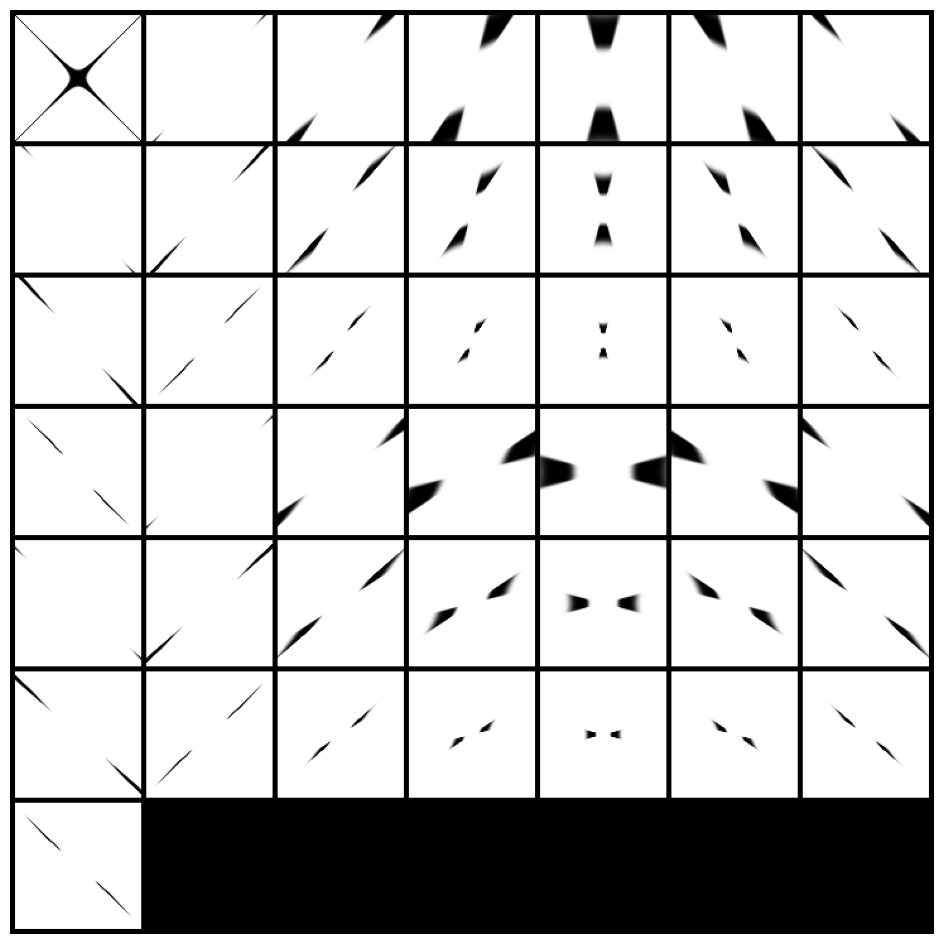

In [6]:
import torch
from torchvision.utils import make_grid
from torchvision.utils import save_image


filename = "image.jpg"
chosen_imags = np.arange(0,43)
# print(chosen_imags)

t_Psi = 1-torch.from_numpy(np.abs(Psi)).float()
t_Psi = t_Psi.permute(2, 0, 1)
t_Psi = t_Psi.unsqueeze(1)

# Crear una cuadrícula con las primeras 9 imágenes
grid = make_grid(t_Psi[chosen_imags], nrow=7, padding=4, normalize=True)

# Convertir la cuadrícula a formato numpy para usar con matplotlib
grid_np = grid.permute(1, 2, 0).numpy()

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(grid_np, cmap='gray')
plt.axis('off')
plt.show()




In [ ]:
# # Crear una cuadrícula de imágenes usando numpy con m filas y n columnas
# def create_grid(images, m, n):
#     assert m * n >= images.shape[2], "Grid size is too small to fit all images"
    
#     h, w = images.shape[:2]
#     grid = np.zeros((h * m, w * n), dtype=images.dtype)
    
#     for idx in range(images.shape[2]):
#         row = idx // n
#         col = idx % n
#         grid[row * h:(row + 1) * h, col * w:(col + 1) * w] = images[:,:,idx]
    
#     return grid

# # Definir el número de filas y columnas de la cuadrícula
# m, n = 2, 3

# Psi_magnitudes = np.abs(Psi)

# # Crear la cuadrícula
# grid = create_grid(Psi_magnitudes[:,:,0:6], m, n)

# # Mostrar y guardar la cuadrícula usando matplotlib
# filename = "image.jpg"
# plt.imshow(grid, cmap='gray')
# plt.axis('off')  # Ocultar los ejes
# plt.savefig(filename, bbox_inches='tight', pad_inches=0)
# plt.show()